### 6. Zakupoholicy

Dane: https://www.kaggle.com/datasets/benpowis/customer-propensity-to-purchase-data


Cel: analiza czy dany klient wykona u nas zakupy czy nie


Stakeholder: właściciel sklepu internetowego starający się zminimalizować ryzyko
występowania porzuconego koszyka

ANALIZA - SPRAWDZMY CO MA WPLYW NA DODAWANIE RZECZY DO KOSZYKA PRZEZ KLIENTA

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [2]:
import xgboost as xgb
xgb.__version__

'2.0.3'

### 1. Przygotowanie Danych

Dodajmy baze danych juz zmienioną na jezyk polski z pliku "Customer propensity to purchase_cleaning_data_2"



In [3]:
df_all = pd.read_csv('training_sample_pl_clean.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220061 entries, 0 to 220060
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ID_uzytkownika                      220061 non-null  object
 1   klik_ikony_koszyka                  220061 non-null  int64 
 2   dodanie_do_koszyka_z_listy          220061 non-null  int64 
 3   dodanie_do_koszyka_z_detali         220061 non-null  int64 
 4   sortowanie_produktu                 220061 non-null  int64 
 5   wybor_obrazu                        220061 non-null  int64 
 6   klik_na_strone_konta                220061 non-null  int64 
 7   klik_na_baner_promo                 220061 non-null  int64 
 8   dodanie_do_listy_zyczen_z_detali    220061 non-null  int64 
 9   rozwijana_lista_produktu            220061 non-null  int64 
 10  zamkniecie_mini_koszyka             220061 non-null  int64 
 11  sprawdzenie_info_dostawy_produkt    220

Usuniemy z obu zestawow kolumne 

- 'kto' - robocza kolumna do podzielenia naszych zestawow 

- 'ID_uzytkownika' - kolejna kolumna nie binarna

In [6]:
df_all = df_all.drop(columns = ['kto'])

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220061 entries, 0 to 220060
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ID_uzytkownika                      220061 non-null  object
 1   klik_ikony_koszyka                  220061 non-null  int64 
 2   dodanie_do_koszyka_z_listy          220061 non-null  int64 
 3   dodanie_do_koszyka_z_detali         220061 non-null  int64 
 4   sortowanie_produktu                 220061 non-null  int64 
 5   wybor_obrazu                        220061 non-null  int64 
 6   klik_na_strone_konta                220061 non-null  int64 
 7   klik_na_baner_promo                 220061 non-null  int64 
 8   dodanie_do_listy_zyczen_z_detali    220061 non-null  int64 
 9   rozwijana_lista_produktu            220061 non-null  int64 
 10  zamkniecie_mini_koszyka             220061 non-null  int64 
 11  sprawdzenie_info_dostawy_produkt    220

In [8]:
df_all = df_all.drop(columns = ['ID_uzytkownika'])

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220061 entries, 0 to 220060
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   klik_ikony_koszyka                  220061 non-null  int64
 1   dodanie_do_koszyka_z_listy          220061 non-null  int64
 2   dodanie_do_koszyka_z_detali         220061 non-null  int64
 3   sortowanie_produktu                 220061 non-null  int64
 4   wybor_obrazu                        220061 non-null  int64
 5   klik_na_strone_konta                220061 non-null  int64
 6   klik_na_baner_promo                 220061 non-null  int64
 7   dodanie_do_listy_zyczen_z_detali    220061 non-null  int64
 8   rozwijana_lista_produktu            220061 non-null  int64
 9   zamkniecie_mini_koszyka             220061 non-null  int64
 10  sprawdzenie_info_dostawy_produkt    220061 non-null  int64
 11  sprawdzenie_info_zwrotu             220061 non-null 

In [10]:
df_all.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie
count,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.00000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000
mean,0.205184,0.154216,0.233672,0.076256,0.055326,0.007389,0.033541,0.007266,0.476718,0.035754,0.130114,0.018995,0.183785,0.165731,0.000804,0.01147,0.002268,0.600184,0.641027,0.231618,0.133749,0.595417,0.923026,0.086762
std,0.403837,0.361157,0.423167,0.265408,0.228615,0.085641,0.180044,0.084932,0.499459,0.185676,0.336429,0.136506,0.387310,0.371840,0.028349,0.10648,0.047565,0.489862,0.479700,0.421867,0.340384,0.490812,0.266551,0.281487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


8,6% zlozonych zamowien w całym zestawie danych

DODAJMY NOWĄ KOLUMNE BINARNA 

Dla każdej 1 w kolumnie 

- dodanie_do_koszyka_z_listy 

- dodanie_do_koszyka_z_detali 

tworzymy nową kolumne - dodanie_do_koszyka.

In [11]:
df_all.columns

Index(['klik_ikony_koszyka', 'dodanie_do_koszyka_z_listy',
       'dodanie_do_koszyka_z_detali', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'zamkniecie_mini_koszyka', 'sprawdzenie_info_dostawy_produkt',
       'sprawdzenie_info_zwrotu', 'logowanie',
       'wyswietlenie_realizacji_zamowienia', 'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_opcji_upgrade_konta',
       'wyswietlenie_strony_glownej', 'urzadzenie_mobilne', 'komputer',
       'tablet', 'powracajcy_klient', 'lokalizacja_uk', 'zlozone_zamowienie'],
      dtype='object')

In [12]:
((df_all['dodanie_do_koszyka_z_listy'] == 1) | (df_all['dodanie_do_koszyka_z_detali'] == 1)).sum()

68621

In [13]:
df_all['dodanie_do_koszyka'] = ((df_all['dodanie_do_koszyka_z_listy'] == 1) | 
                                (df_all['dodanie_do_koszyka_z_detali'] == 1)).astype(int)

In [14]:
df_all['dodanie_do_koszyka'].sum()

68621

In [15]:
df_all.describe()

,klik_ikony_koszyka,dodanie_do_koszyka_z_listy,dodanie_do_koszyka_z_detali,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie,dodanie_do_koszyka
count,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.00000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000
mean,0.205184,0.154216,0.233672,0.076256,0.055326,0.007389,0.033541,0.007266,0.476718,0.035754,0.130114,0.018995,0.183785,0.165731,0.000804,0.01147,0.002268,0.600184,0.641027,0.231618,0.133749,0.595417,0.923026,0.086762,0.311827
std,0.403837,0.361157,0.423167,0.265408,0.228615,0.085641,0.180044,0.084932,0.499459,0.185676,0.336429,0.136506,0.387310,0.371840,0.028349,0.10648,0.047565,0.489862,0.479700,0.421867,0.340384,0.490812,0.266551,0.281487,0.463241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


mozemy usunac te dwie doatkowe kolumny dodania do koszyka

In [16]:
df_all.drop(['dodanie_do_koszyka_z_listy', 'dodanie_do_koszyka_z_detali'], axis=1, inplace=True)

In [17]:
df_all['dodanie_do_koszyka'].mean()

0.31182717519233305

In [18]:
corr = df_all.corr(method = 'spearman', numeric_only=True)

In [19]:
# Defining custom color palette with more colors
colors = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', 
          '#c6dbef', '#deebf7', '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a', 
          '#ef3b2c', '#cb181d', '#a50f15', '#67000d']

cmap = ListedColormap(colors)

# Apply color gradient to correlation matrix
corr.style.background_gradient(cmap=cmap, vmin=-1, vmax=1)

,klik_ikony_koszyka,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,logowanie,wyswietlenie_realizacji_zamowienia,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,zlozone_zamowienie,dodanie_do_koszyka
klik_ikony_koszyka,1.000000,0.003935,0.026032,0.038416,0.068533,0.024631,0.125890,0.297600,0.346846,0.035308,0.414024,0.395848,0.001859,0.028228,0.020254,-0.033586,0.066144,-0.047565,-0.017097,0.134467,0.045999,0.386141,0.525417
sortowanie_produktu,0.003935,1.000000,0.156494,-0.022790,0.032252,0.011907,0.012176,0.000739,0.005779,0.002289,-0.007166,-0.006176,0.002115,0.012788,0.005381,-0.007469,-0.373166,0.345877,0.108175,-0.019943,-0.059371,0.011377,0.020374
wybor_obrazu,0.026032,0.156494,1.000000,-0.018094,0.024801,0.029380,-0.027382,0.001038,0.048321,0.049616,0.020396,0.020058,0.002249,0.018361,0.003089,-0.052192,-0.314234,0.309468,0.068592,-0.026737,-0.047714,0.035778,0.042501
klik_na_strone_konta,0.038416,-0.022790,-0.018094,1.000000,0.006325,0.009487,-0.022006,0.025395,0.051327,0.026866,0.177849,0.065431,0.006911,0.043529,0.024891,0.043555,0.061135,-0.041835,-0.025484,0.013606,0.001425,0.045038,0.013971
klik_na_baner_promo,0.068533,0.032252,0.024801,0.006325,1.000000,0.023883,0.028013,0.039434,0.030131,0.014385,0.032223,0.028287,-0.001724,0.014540,0.013405,-0.019164,-0.030223,0.031256,0.008290,0.005308,-0.018451,0.028747,0.065294
dodanie_do_listy_zyczen_z_detali,0.024631,0.011907,0.029380,0.009487,0.023883,1.000000,0.004577,0.022427,0.023529,0.022195,0.117025,0.035828,-0.000540,0.008874,0.006045,-0.009360,-0.006581,0.012003,0.001593,0.008713,-0.011425,0.010505,0.019333
rozwijana_lista_produktu,0.125890,0.012176,-0.027382,-0.022006,0.028013,0.004577,1.000000,0.077283,0.000545,-0.033171,-0.015701,-0.016232,-0.012638,-0.018904,-0.004186,-0.223667,0.063705,-0.105123,0.046984,0.059887,0.032738,0.040339,0.195210
zamkniecie_mini_koszyka,0.297600,0.000739,0.001038,0.025395,0.039434,0.022427,0.077283,1.000000,0.098736,0.012828,0.116457,0.112551,0.002306,0.011437,0.007800,-0.018198,0.015122,-0.055366,0.054620,0.054265,0.028246,0.114103,0.201001
sprawdzenie_info_dostawy_produkt,0.346846,0.005779,0.048321,0.051327,0.030131,0.023529,0.000545,0.098736,1.000000,0.202957,0.586994,0.622746,0.006180,0.190733,0.029554,-0.041500,-0.037295,0.046749,0.011482,0.012203,0.044188,0.787519,0.349909
sprawdzenie_info_zwrotu,0.035308,0.002289,0.049616,0.026866,0.014385,0.022195,-0.033171,0.012828,0.202957,1.000000,0.057138,0.051589,0.018363,0.053166,0.019262,-0.043001,-0.029042,0.029973,0.006839,-0.031664,0.000593,0.039066,0.039636


In [20]:
# Oblicz macierz korelacji
corr_matrix = df_all.corr(method='spearman', numeric_only=True)

# Nazwa kolumny, dla której chcesz uzyskać korelacje
target_column = 'dodanie_do_koszyka'

# Filtruj i drukuj wartości korelacji większe niż 0.3 lub mniejsze niż -0.3 dla kolumny zlozone_zamowienie
print(f"Wartości korelacji większe od 0.3 lub mniejsze od -0.3 dla kolumny '{target_column}':")
for col in corr_matrix.columns:
    if col != target_column:
        corr_value = corr_matrix.loc[target_column, col]
        if (corr_value > 0.3 or corr_value < -0.3):
            print(f"Korelacja pomiędzy '{target_column}' i '{col}': {corr_value}")

Wartości korelacji większe od 0.3 lub mniejsze od -0.3 dla kolumny 'dodanie_do_koszyka':
Korelacja pomiędzy 'dodanie_do_koszyka' i 'klik_ikony_koszyka': 0.5254168472062264
Korelacja pomiędzy 'dodanie_do_koszyka' i 'sprawdzenie_info_dostawy_produkt': 0.34990949278632577
Korelacja pomiędzy 'dodanie_do_koszyka' i 'logowanie': 0.4138894833200737
Korelacja pomiędzy 'dodanie_do_koszyka' i 'wyswietlenie_realizacji_zamowienia': 0.40514662622801506
Korelacja pomiędzy 'dodanie_do_koszyka' i 'zlozone_zamowienie': 0.38554739211329786


DODANIE DO KOSZYKA ---> LOGOWANIE ---> ZAMOWIENIE ---> WYSWIETLENIE REALIZACJI ZAMOWIENIA


Zazwyczaj jest taka kolejność czynności.

"zamowienie" i "wyswietlenie reliazacji" nie ma zadnego rzeczywistego wplywu na dodanie rzeczy do koszyka

Są to czynnosci które wykonuje się po dodaniu do koszyka. Logowanie najczęsciej tez

USUWAMY JE Z ANALIZY

In [21]:
df_all.drop(['zlozone_zamowienie', 'wyswietlenie_realizacji_zamowienia', 'logowanie'], axis=1, inplace=True)

In [22]:
df_all.head(10)

,klik_ikony_koszyka,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,dodanie_do_koszyka
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [23]:
df_all.describe()

,klik_ikony_koszyka,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,zamkniecie_mini_koszyka,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,dodanie_do_koszyka
count,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.00000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000,220061.000000
mean,0.205184,0.076256,0.055326,0.007389,0.033541,0.007266,0.476718,0.035754,0.130114,0.018995,0.000804,0.01147,0.002268,0.600184,0.641027,0.231618,0.133749,0.595417,0.923026,0.311827
std,0.403837,0.265408,0.228615,0.085641,0.180044,0.084932,0.499459,0.185676,0.336429,0.136506,0.028349,0.10648,0.047565,0.489862,0.479700,0.421867,0.340384,0.490812,0.266551,0.463241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Z logicznego punktu widzenia - zamkniecie koszyka oraz otwarcie koszyka nastepuje również po dodaniu jakiś produktów

In [24]:
df_all.drop(['klik_ikony_koszyka', 'zamkniecie_mini_koszyka'], axis=1, inplace=True)

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220061 entries, 0 to 220060
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   sortowanie_produktu               220061 non-null  int64
 1   wybor_obrazu                      220061 non-null  int64
 2   klik_na_strone_konta              220061 non-null  int64
 3   klik_na_baner_promo               220061 non-null  int64
 4   dodanie_do_listy_zyczen_z_detali  220061 non-null  int64
 5   rozwijana_lista_produktu          220061 non-null  int64
 6   sprawdzenie_info_dostawy_produkt  220061 non-null  int64
 7   sprawdzenie_info_zwrotu           220061 non-null  int64
 8   wyswietlenie_tabeli_rozmiarow     220061 non-null  int64
 9   wyswietlenie_info_o_dostawie_FAQ  220061 non-null  int64
 10  wyswietlenie_opcji_upgrade_konta  220061 non-null  int64
 11  wyswietlenie_strony_glownej       220061 non-null  int64
 12  urzadzenie_mobil

In [26]:
rows_with_zero_sum = df_all[df_all.sum(axis=1) == 0]
rows_with_zero_sum

,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk,dodanie_do_koszyka


Nie ma wierszy które mają same zera w każdej kolumnie

### 2. Podzial na zbior testowy i treningowy

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_all.drop('dodanie_do_koszyka',axis=1), df_all['dodanie_do_koszyka'], train_size=0.8, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(176048, 17)
(44013, 17)
(176048,)
(44013,)


### 3. Trening modelu

### XGBOOST

In [29]:
model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators = 50,       # liczba drzew
    learning_rate = 0.1,      # szybkość uczenia się
    max_depth = 6,            # maksymalna głębokość drzew
    subsample = 0.8,          # proporcja próbek użytych do trenowania każdego drzewa
    colsample_bytree = 0.8,   # proporcja cech użytych do trenowania każdego drzewa
    gamma = 0.001,          # parametr gamma - min split loss - zapobiega nadmiernemyu dopasowaniu
    reg_lambda = 1,         # współczynnik regularyzacji
    max_leaves = 20        # Maksymalna liczba liści
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=20,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=20,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


### 4. Ocena modelu

In [31]:
# Przewidywania na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena wyników
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Dokładność: ", accuracy)
print("Macierz konfuzji: \n", conf_matrix)
print("Raport klasyfikacji: \n", class_report)

Dokładność:  0.7658191897848363
Macierz konfuzji: 
 [[28601  1580]
 [ 8727  5105]]
Raport klasyfikacji: 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85     30181
           1       0.76      0.37      0.50     13832

    accuracy                           0.77     44013
   macro avg       0.76      0.66      0.67     44013
weighted avg       0.77      0.77      0.74     44013



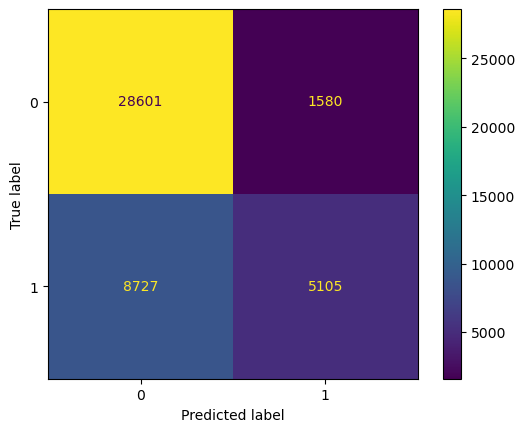

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### 5. Tuning Hiperparametrów

In [33]:
param_grid = {
    'n_estimators': [50, 100],          # liczba drzew decyzyjnych
    'learning_rate': [0.1, 0.2],        # szybkosc uczenia
    'max_depth': [4, 6, 8],             # maxymalna glebokosc kazdego drzewa
    'subsample': [0.8, 1.0],            # proporcja probek uzywanych do trenowania drzewa
    'colsample_bytree': [0.8, 1.0],     # proporcja kolumn do trenownaia drzewa
    'gamma': [0.001, 0.01, 0.1],        # Parametr gamma
    'reg_lambda': [1, 10],              # Parametr regularizacji L2
    'max_leaves': [10, 20]              # Maksymalna liczba liści
}


In [34]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("Najlepsze parametry: ", grid_search.best_params_)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Najlepsze parametry:  {'colsample_bytree': 1.0, 'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 6, 'max_leaves': 20, 'n_estimators': 100, 'reg_lambda': 1, 'subsample': 0.8}


Najlepsze parametry:  {'colsample_bytree': 1.0, 'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 6, 'max_leaves': 20, 'n_estimators': 100, 'reg_lambda': 1, 'subsample': 0.8}

In [35]:
# Ocena najlepszego modelu na zbiorze testowym
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Wyświetlanie wyników
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Dokładność: ", accuracy)
print("Macierz konfuzji: \n", conf_matrix)
print("Raport klasyfikacji: \n", class_report)

Dokładność:  0.7667961738577238
Macierz konfuzji: 
 [[28553  1628]
 [ 8636  5196]]
Raport klasyfikacji: 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85     30181
           1       0.76      0.38      0.50     13832

    accuracy                           0.77     44013
   macro avg       0.76      0.66      0.68     44013
weighted avg       0.77      0.77      0.74     44013



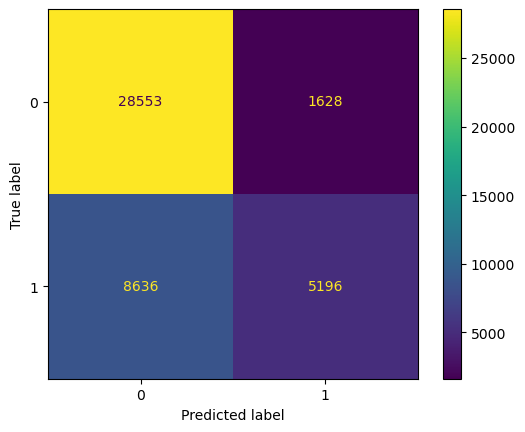

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Nie dodal, nie przewidziano: 28553

Nie dodal, przewidziano, ze doda: 1628 --- dlaczego? Stracona szansa

Dodal, przewidzielismy ze nie doda: 8636  --- co wplynelo?

Dodal, przewidziano ze doda: 5196

### 6. Ważność cech:

In [37]:
X = df_all.drop('dodanie_do_koszyka', axis=1)
y = df_all['dodanie_do_koszyka']

In [38]:
# Wartości ważności cech
feature_importance = best_model.feature_importances_

# Tworzenie DataFrame z nazwami cech i ich ważnością
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sortowanie cech według ważności
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Wyświetlenie 10 najważniejszych cech
print("Najważniejsze cechy:")
print(feature_importance_df)

Najważniejsze cechy:
                             Feature  Importance
6   sprawdzenie_info_dostawy_produkt    0.436552
11       wyswietlenie_strony_glownej    0.146761
5           rozwijana_lista_produktu    0.122305
0                sortowanie_produktu    0.047496
1                       wybor_obrazu    0.045800
12                urzadzenie_mobilne    0.044602
3                klik_na_baner_promo    0.032769
15                 powracajcy_klient    0.029353
16                    lokalizacja_uk    0.028485
9   wyswietlenie_info_o_dostawie_FAQ    0.020934
7            sprawdzenie_info_zwrotu    0.016299
8      wyswietlenie_tabeli_rozmiarow    0.006932
4   dodanie_do_listy_zyczen_z_detali    0.005456
2               klik_na_strone_konta    0.005100
13                          komputer    0.004804
14                            tablet    0.003857
10  wyswietlenie_opcji_upgrade_konta    0.002495


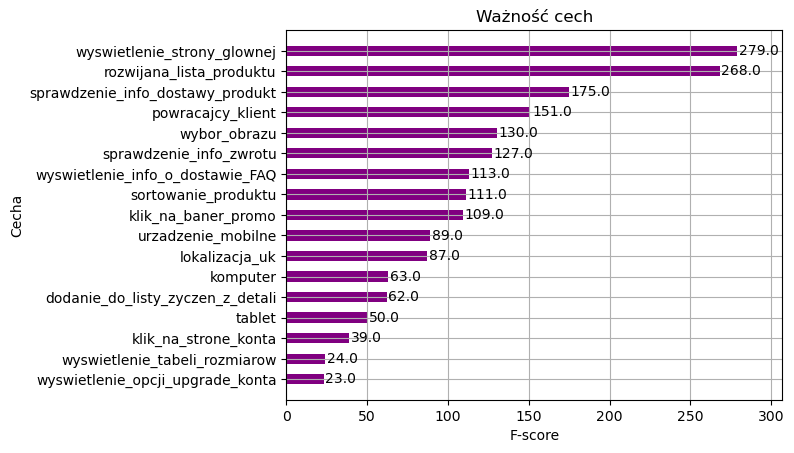

In [39]:
# Tworzenie wykresu ważności cech
xgb.plot_importance(best_model, height=0.5, color='purple', xlabel='F-score', ylabel='Cecha', title='Ważność cech')

# Get the current figure (assuming it's the last one plotted)
fig = plt.gcf()

# Save the plot as PNG with transparent background
fig.savefig('plot.png', bbox_inches='tight', pad_inches=0, transparent=True)

<Axes: title={'center': 'Ważność cech'}, xlabel='F-score', ylabel='Cecha'>

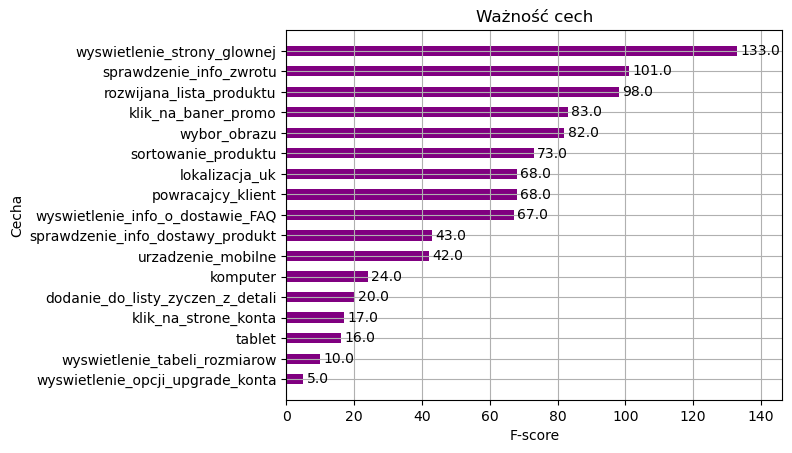

In [40]:
xgb.plot_importance(model, height=0.5, color='purple', xlabel='F-score', ylabel='Cecha', title='Ważność cech')


In [41]:
?to_graphviz

Object `to_graphviz` not found.


In [42]:
from xgboost import to_graphviz

# Konwersja najlepszego drzewa do formatu Graphviz
tree_graph = to_graphviz(best_model, num_trees=0, show_counts=True)  # Możesz zmienić num_trees na numer konkretnego drzewa, które chcesz wyświetlić
#tree_graph.render("best_tree", format="png", cleanup=True)  # Zapisywanie drzewa do pliku PNG

# Wyświetlenie drzewa
tree_graph.view()


'Source.gv.pdf'

In [43]:
tree_graph = to_graphviz(best_model, num_trees=0, rankdir='LR', condition_node_params={'shape': 'box', 'style': 'filled', 'fillcolor': '#78bceb'})

# Save the tree as PNG
tree_graph.render("best_tree", format="png", cleanup=True)

# Optionally, view the tree interactively
tree_graph.view()

'best_tree.pdf'

Ilość próbek w lisciu

In [44]:

# Uzyskanie numerów liści dla każdego wiersza danych
leaf_indices = best_model.apply(X)

# Uzyskanie wartości liści dla każdego drzewa
leaf_values = []
trees = best_model.get_booster().get_dump()
for i, tree in enumerate(trees):
    tree_values = []
    for j in range(len(X)):
        leaf_index = int(leaf_indices[j][i])  # Konwersja na int
        lines = tree.split('\n')
        if leaf_index >= len(lines) - 1:
            continue  # Pominięcie przypadków, gdy leaf_index jest poza zakresem drzewa
        leaf_line = lines[leaf_index + 1]
        split_line = leaf_line.split('=')
        if len(split_line) < 2:
            continue  # Pominięcie przypadków, gdy nie można podzielić linii po '='
        leaf_value_str = split_line[1].split(',')[0].strip()  # Wartość w liściu jako string
        try:
            leaf_value = float(leaf_value_str)  # Konwersja na float, jeśli możliwe
        except ValueError:
            leaf_value = leaf_value_str  # Pozostawienie jako ciąg tekstowy, jeśli nie można przekonwertować na float
        tree_values.append(leaf_value)
    leaf_values.append(tree_values)  # Dodanie listy wartości w liściu dla danego drzewa

# Znalezienie numeru drzewa z najwyższą wartością w liściu
max_leaf_values = [np.max(vals) for vals in leaf_values]
tree_with_max_leaf_value = np.argmax(max_leaf_values)
max_leaf_value = max_leaf_values[tree_with_max_leaf_value]

print(f"Najwyższa wartość w liściu: {max_leaf_value}")
print(f"Numer drzewa: {tree_with_max_leaf_value}")

Najwyższa wartość w liściu: 37.0
Numer drzewa: 53


In [45]:
# Przykładowy kod do uzyskania struktury drzewa
trees = best_model.get_booster().get_dump()

# Wyświetlenie struktury pierwszego drzewa
print(trees[0])  # Możesz zmieniać indeks, aby zobaczyć inne drzewa

0:[sprawdzenie_info_dostawy_produkt<1] yes=1,no=2,missing=2
	1:[rozwijana_lista_produktu<1] yes=3,no=4,missing=4
		3:[wyswietlenie_strony_glownej<1] yes=7,no=8,missing=8
			7:[urzadzenie_mobilne<1] yes=15,no=16,missing=16
				15:[sortowanie_produktu<1] yes=31,no=32,missing=32
					31:leaf=0.00704572117
					32:leaf=-0.0922596082
				16:[powracajcy_klient<1] yes=33,no=34,missing=34
					33:leaf=0.190119401
					34:leaf=0.05744607
			8:[wybor_obrazu<1] yes=17,no=18,missing=18
				17:[klik_na_baner_promo<1] yes=35,no=36,missing=36
					35:leaf=-0.109748818
					36:leaf=-0.0473511033
				18:[sprawdzenie_info_zwrotu<1] yes=37,no=38,missing=38
					37:leaf=-0.0266816653
					38:leaf=0.139924705
		4:[wyswietlenie_strony_glownej<1] yes=9,no=10,missing=10
			9:[klik_na_baner_promo<1] yes=19,no=20,missing=20
				19:leaf=-0.0160651375
				20:leaf=0.0853392109
			10:[lokalizacja_uk<1] yes=21,no=22,missing=22
				21:leaf=-0.0309224557
				22:leaf=0.0354197957
	2:[rozwijana_lista_produktu<1] yes=5,n

### 7. Analiza Błędów

In [47]:
# Przewidywane etykiety dla danych testowych
y_pred = best_model.predict(X_test)

# Tworzenie DataFrame z prawdziwymi i przewidywanymi etykietami
error_analysis_df = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})

# Dodawanie cech do DataFrame z danymi testowymi
error_analysis_df = pd.concat([error_analysis_df, X_test], axis=1)

# Wybieranie przypadków, w których model się pomylił
misclassified_samples = error_analysis_df[error_analysis_df['True Label'] != error_analysis_df['Predicted Label']]

# Wyświetlanie analizy błędów
print("Analiza błędów:")
print(misclassified_samples)

Analiza błędów:
        True Label  Predicted Label  sortowanie_produktu  wybor_obrazu  \
1517             1                0                    1             0   
78112            1                0                    0             0   
92595            1                0                    1             0   
147234           1                0                    1             0   
148829           1                0                    0             0   
...            ...              ...                  ...           ...   
131554           1                0                    0             0   
132523           1                0                    0             0   
136605           1                0                    0             0   
188412           1                0                    0             1   
53177            1                0                    0             0   

        klik_na_strone_konta  klik_na_baner_promo  \
1517                       0              

In [48]:
misclassified_samples.describe()

,True Label,Predicted Label,sortowanie_produktu,wybor_obrazu,klik_na_strone_konta,klik_na_baner_promo,dodanie_do_listy_zyczen_z_detali,rozwijana_lista_produktu,sprawdzenie_info_dostawy_produkt,sprawdzenie_info_zwrotu,wyswietlenie_tabeli_rozmiarow,wyswietlenie_info_o_dostawie_FAQ,wyswietlenie_opcji_upgrade_konta,wyswietlenie_strony_glownej,urzadzenie_mobilne,komputer,tablet,powracajcy_klient,lokalizacja_uk
count,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000
mean,0.841387,0.158613,0.081352,0.063426,0.004287,0.042284,0.009158,0.623149,0.130066,0.027085,0.000292,0.015004,0.002241,0.489478,0.673909,0.202358,0.130651,0.651695,0.942615
std,0.365332,0.365332,0.273389,0.243739,0.065337,0.201245,0.095264,0.484621,0.336393,0.162339,0.017095,0.121574,0.047287,0.499914,0.468804,0.401777,0.337034,0.476456,0.232588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Histrogram Błędu

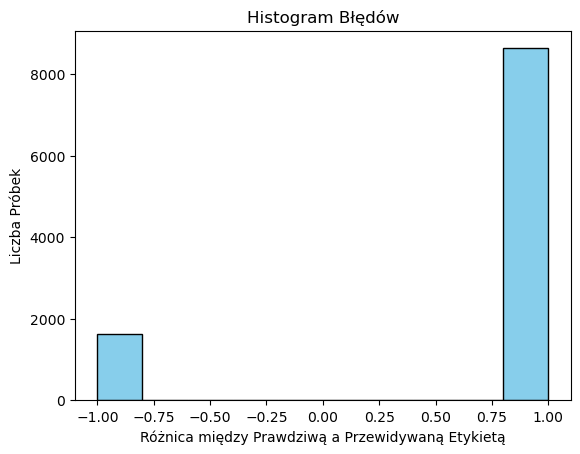

In [49]:
# Obliczenie błędów
errors = misclassified_samples['True Label'] - misclassified_samples['Predicted Label']

# Wykres histogramu błędów
plt.hist(errors, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Różnica między Prawdziwą a Przewidywaną Etykietą')
plt.ylabel('Liczba Próbek')
plt.title('Histogram Błędów')
plt.show()

In [50]:
misclassified_samples.to_csv('misclassified_samples.csv', index=False)

Analiza klasyfikacji cech:

In [51]:
misclassified_samples.columns

Index(['True Label', 'Predicted Label', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'sprawdzenie_info_dostawy_produkt', 'sprawdzenie_info_zwrotu',
       'wyswietlenie_tabeli_rozmiarow', 'wyswietlenie_info_o_dostawie_FAQ',
       'wyswietlenie_opcji_upgrade_konta', 'wyswietlenie_strony_glownej',
       'urzadzenie_mobilne', 'komputer', 'tablet', 'powracajcy_klient',
       'lokalizacja_uk'],
      dtype='object')

In [54]:
cols = ['True Label', 'Predicted Label', 'sortowanie_produktu', 'wybor_obrazu',
       'klik_na_strone_konta', 'klik_na_baner_promo',
       'dodanie_do_listy_zyczen_z_detali', 'rozwijana_lista_produktu',
       'sprawdzenie_info_dostawy_produkt', 'sprawdzenie_info_zwrotu',
       'wyswietlenie_tabeli_rozmiarow',
       'wyswietlenie_info_o_dostawie_FAQ', 'wyswietlenie_opcji_upgrade_konta',
       'wyswietlenie_strony_glownej', 'urzadzenie_mobilne', 'komputer',
       'tablet', 'powracajcy_klient', 'lokalizacja_uk']

In [55]:
for i in cols:
    print(f'Liczba kategorii zmiennej {i}: \n {misclassified_samples[i].value_counts()}')

Liczba kategorii zmiennej True Label: 
 True Label
1    8636
0    1628
Name: count, dtype: int64
Liczba kategorii zmiennej Predicted Label: 
 Predicted Label
0    8636
1    1628
Name: count, dtype: int64
Liczba kategorii zmiennej sortowanie_produktu: 
 sortowanie_produktu
0    9429
1     835
Name: count, dtype: int64
Liczba kategorii zmiennej wybor_obrazu: 
 wybor_obrazu
0    9613
1     651
Name: count, dtype: int64
Liczba kategorii zmiennej klik_na_strone_konta: 
 klik_na_strone_konta
0    10220
1       44
Name: count, dtype: int64
Liczba kategorii zmiennej klik_na_baner_promo: 
 klik_na_baner_promo
0    9830
1     434
Name: count, dtype: int64
Liczba kategorii zmiennej dodanie_do_listy_zyczen_z_detali: 
 dodanie_do_listy_zyczen_z_detali
0    10170
1       94
Name: count, dtype: int64
Liczba kategorii zmiennej rozwijana_lista_produktu: 
 rozwijana_lista_produktu
1    6396
0    3868
Name: count, dtype: int64
Liczba kategorii zmiennej sprawdzenie_info_dostawy_produkt: 
 sprawdzenie_info

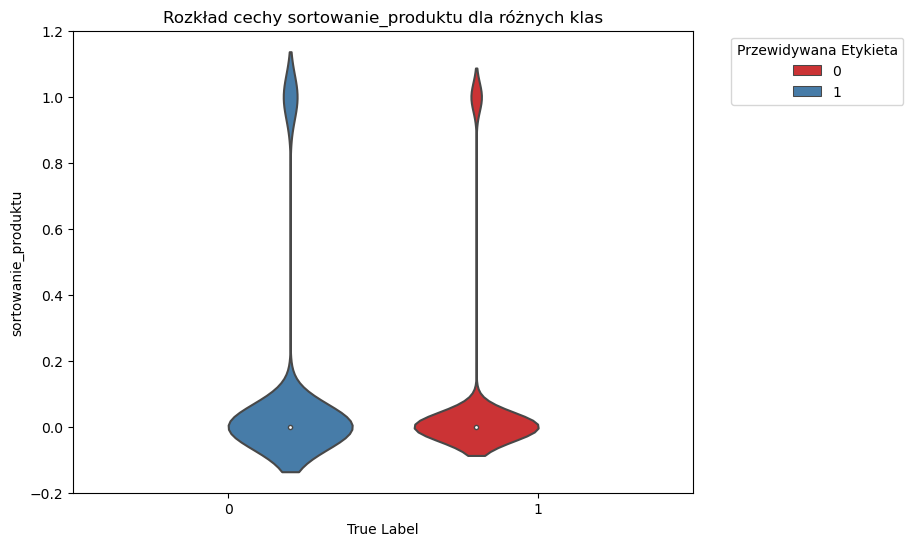

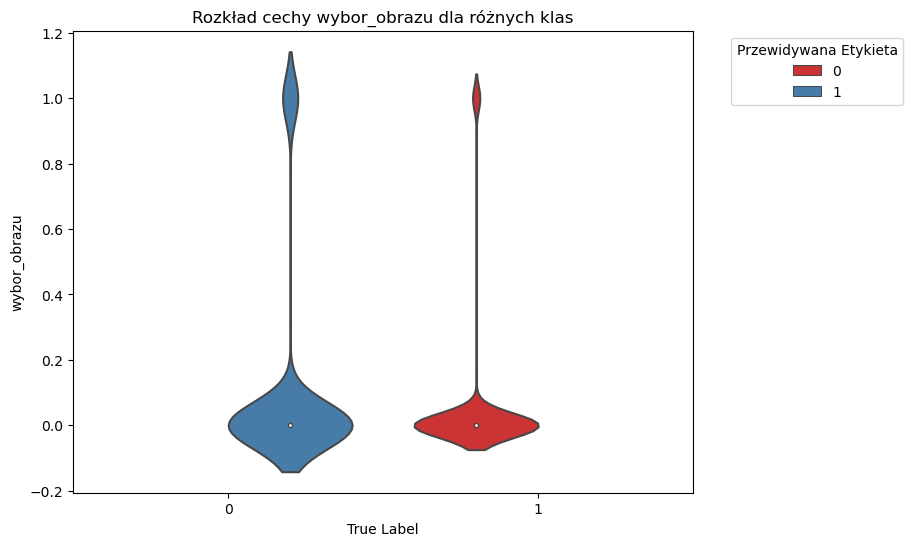

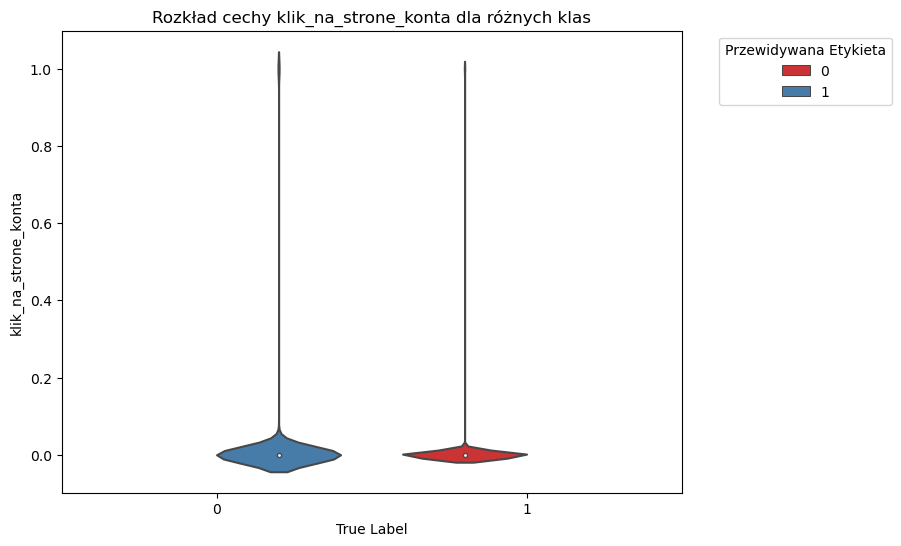

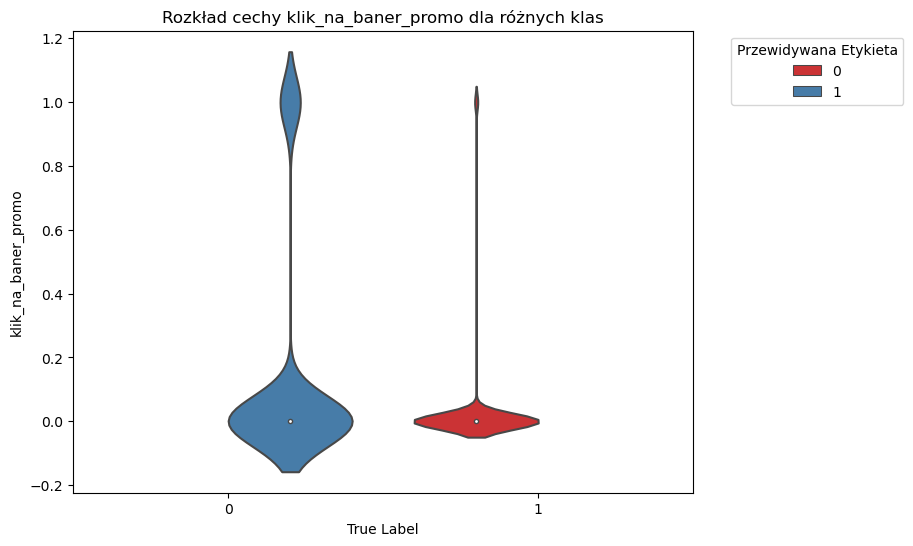

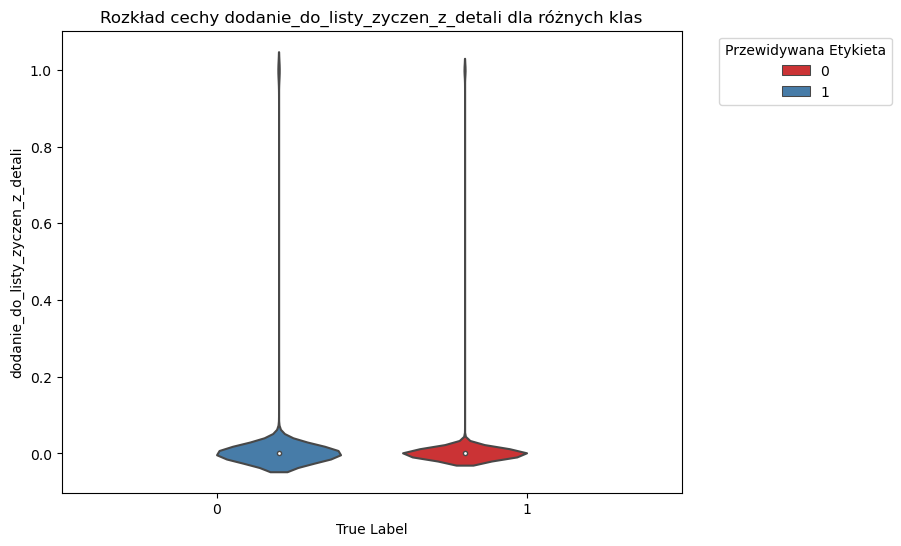

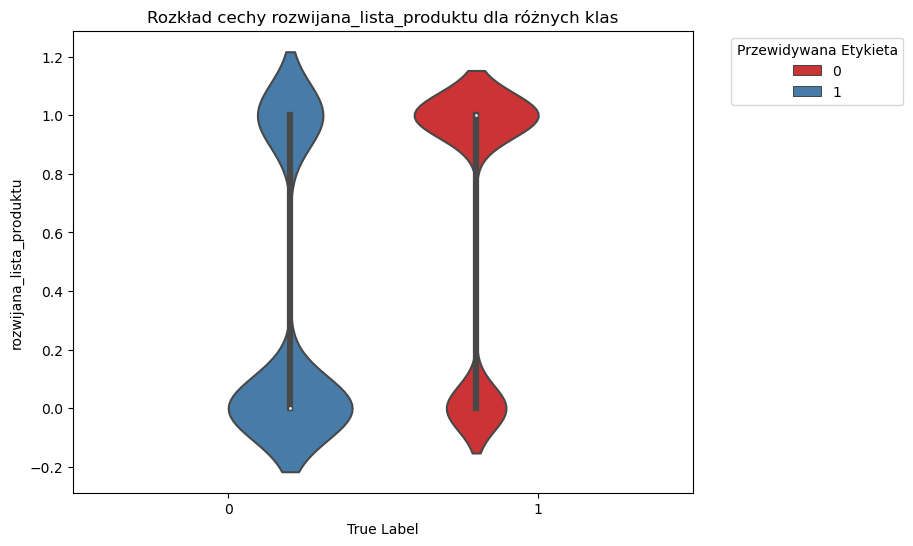

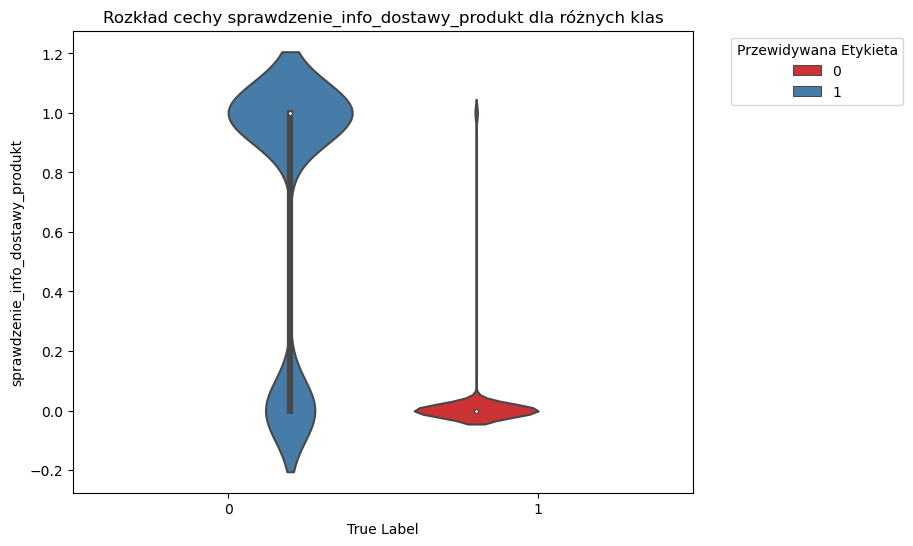

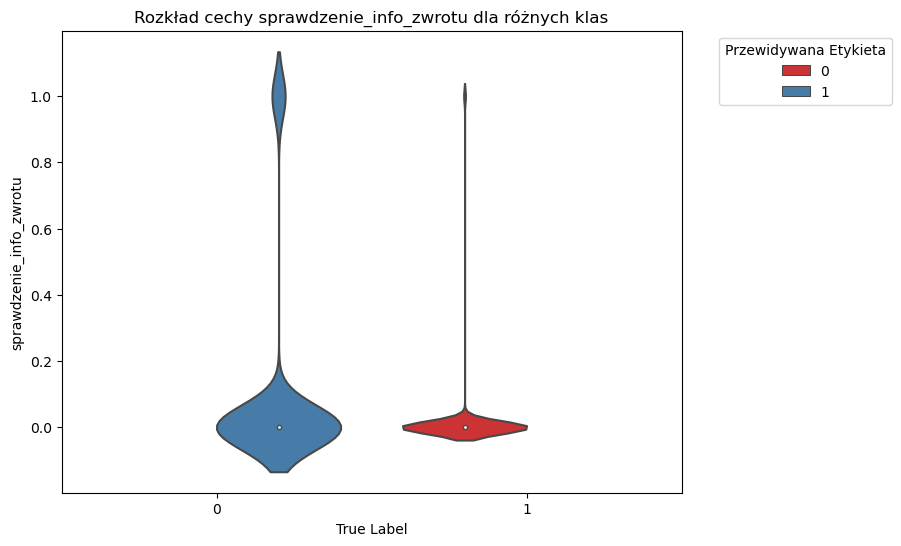

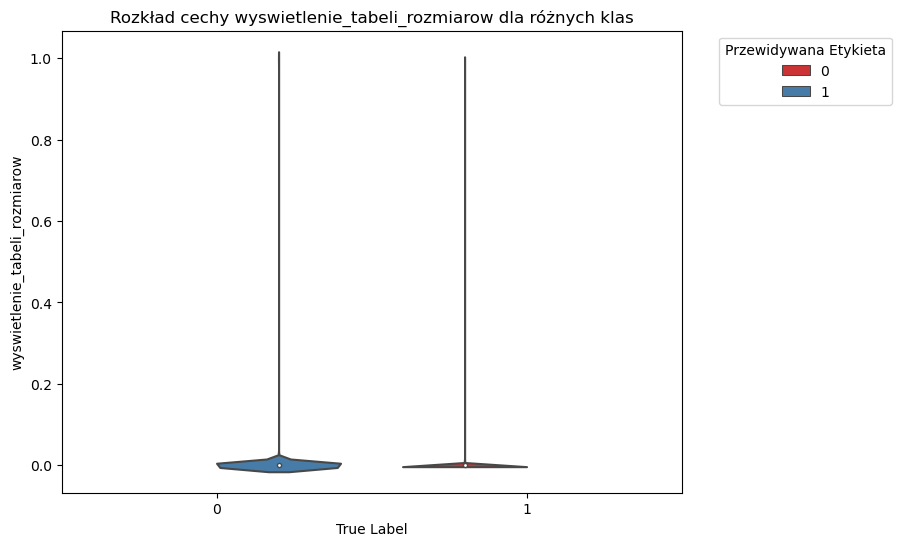

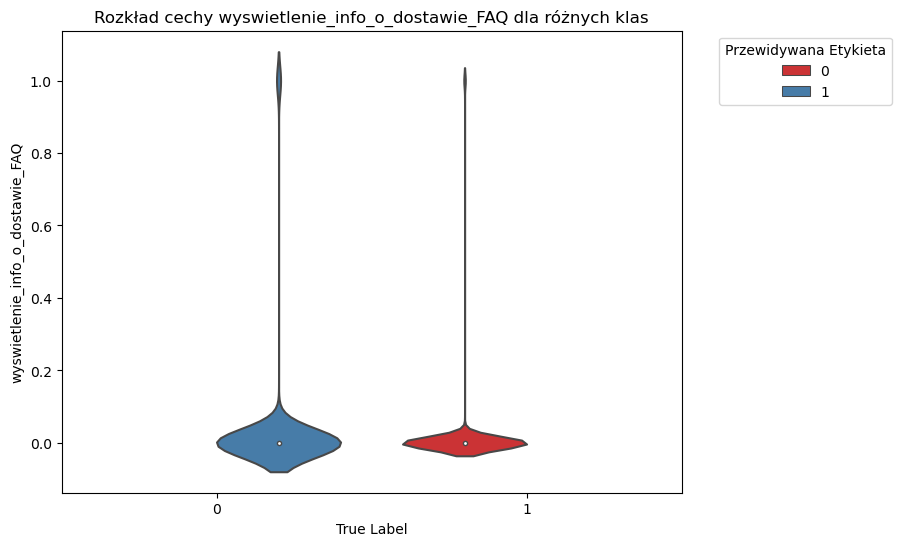

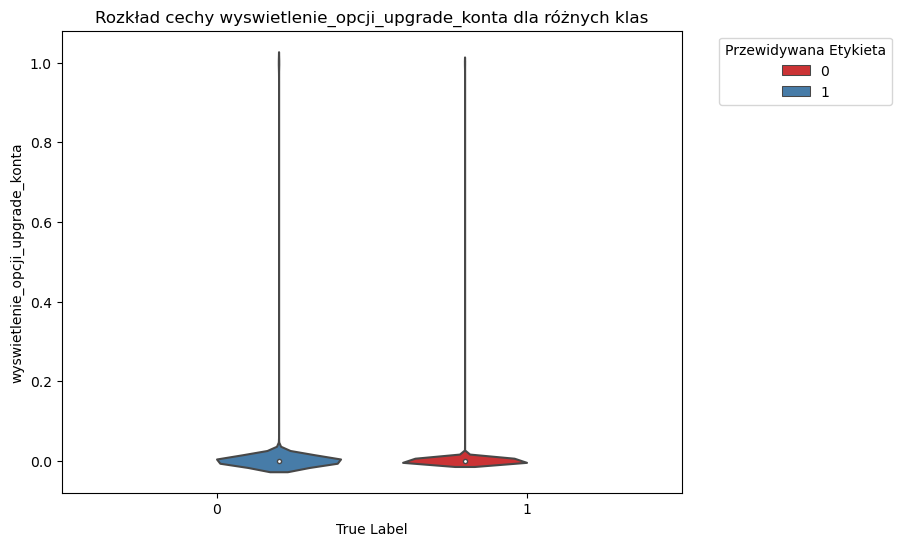

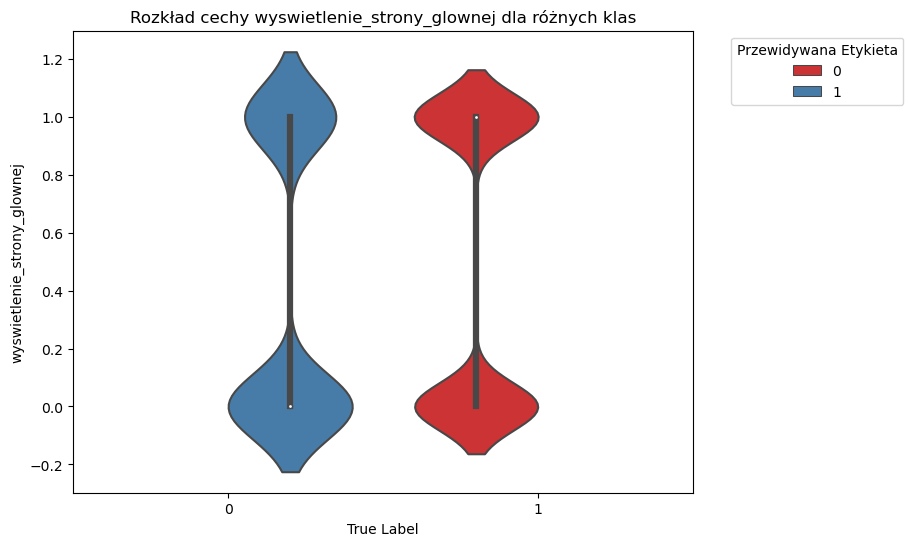

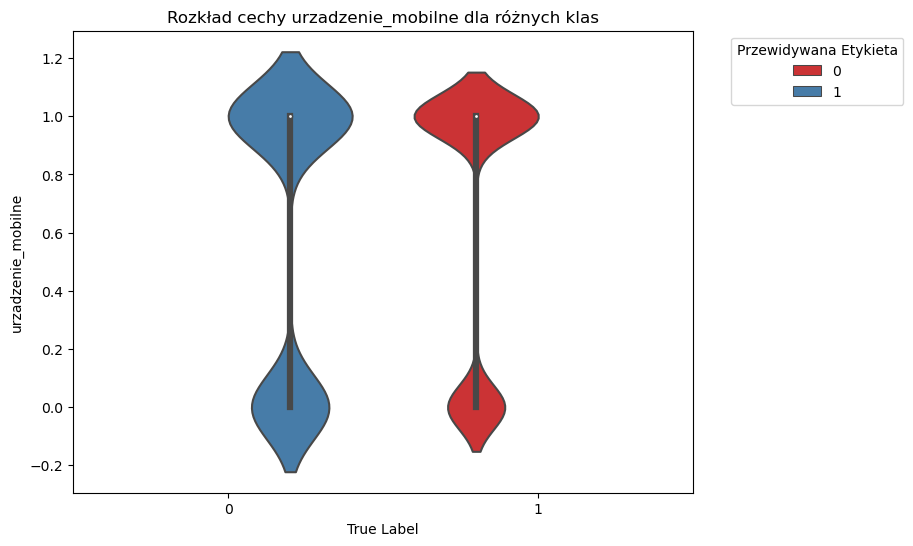

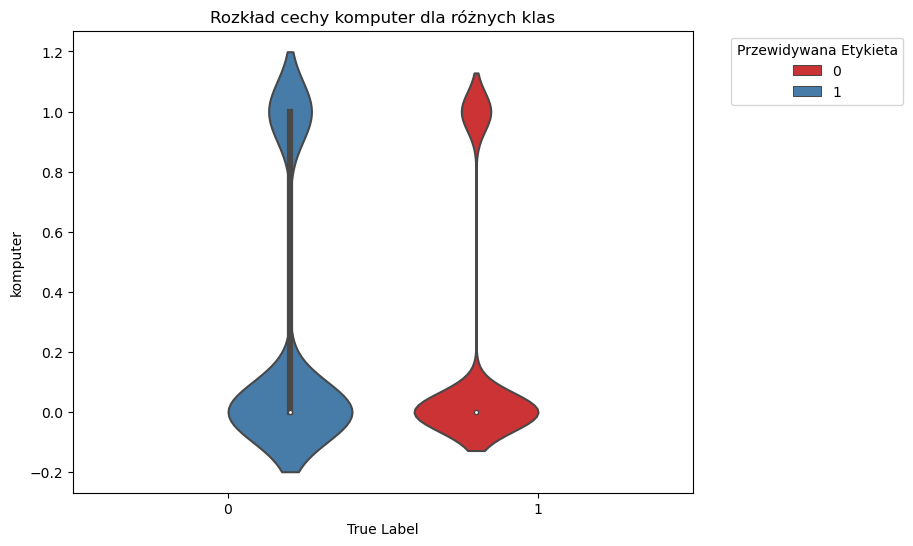

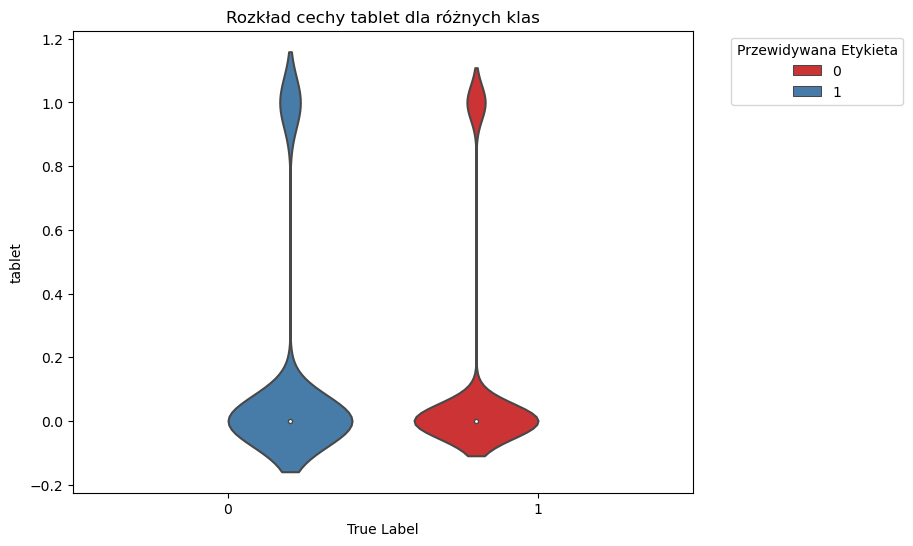

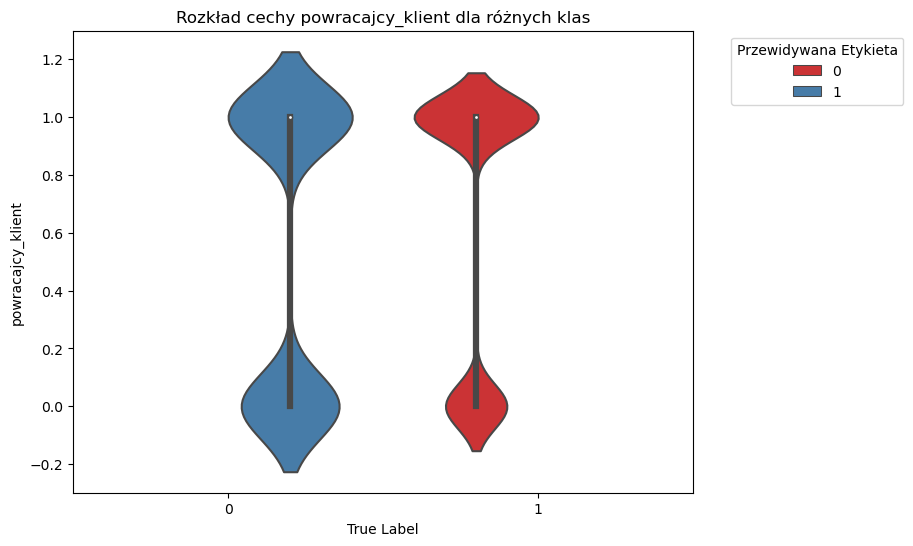

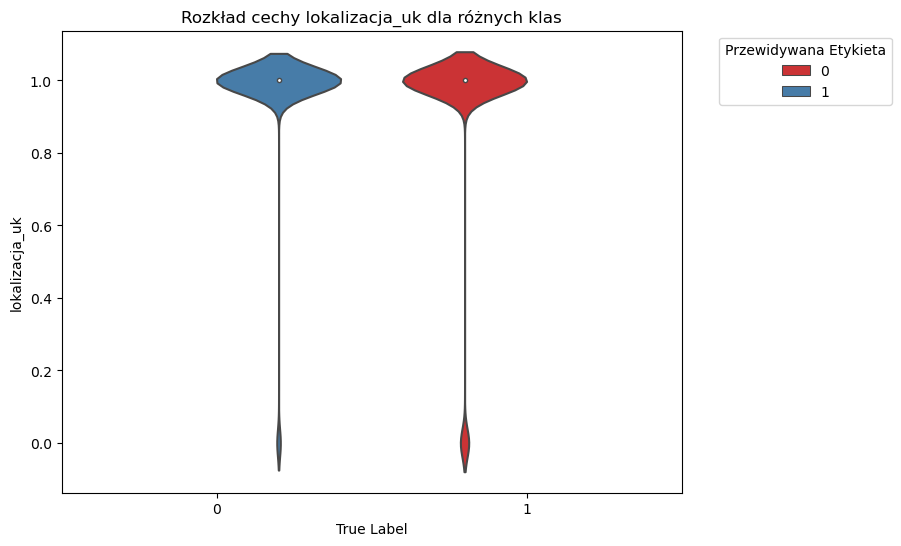

In [56]:
# Wybierz kilka istotnych cech
selected_features = ['sortowanie_produktu', 
                    'wybor_obrazu',
                    'klik_na_strone_konta', 
                    'klik_na_baner_promo',
                    'dodanie_do_listy_zyczen_z_detali', 
                    'rozwijana_lista_produktu',
                    'sprawdzenie_info_dostawy_produkt', 
                    'sprawdzenie_info_zwrotu',
                    'wyswietlenie_tabeli_rozmiarow',
                    'wyswietlenie_info_o_dostawie_FAQ', 
                    'wyswietlenie_opcji_upgrade_konta',
                    'wyswietlenie_strony_glownej', 
                    'urzadzenie_mobilne', 'komputer',
                    'tablet', 
                    'powracajcy_klient', 
                    'lokalizacja_uk']

# Wykresy dla wybranych cech
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='True Label', y=feature, data=misclassified_samples, palette='Set1', hue='Predicted Label')
    plt.title(f'Rozkład cechy {feature} dla różnych klas')
    plt.legend(title='Przewidywana Etykieta', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### SHAPney


c:\Users\mierz\anaconda3\envs\infoshare_virtual_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 43821/44013 [01:59<00:00]        

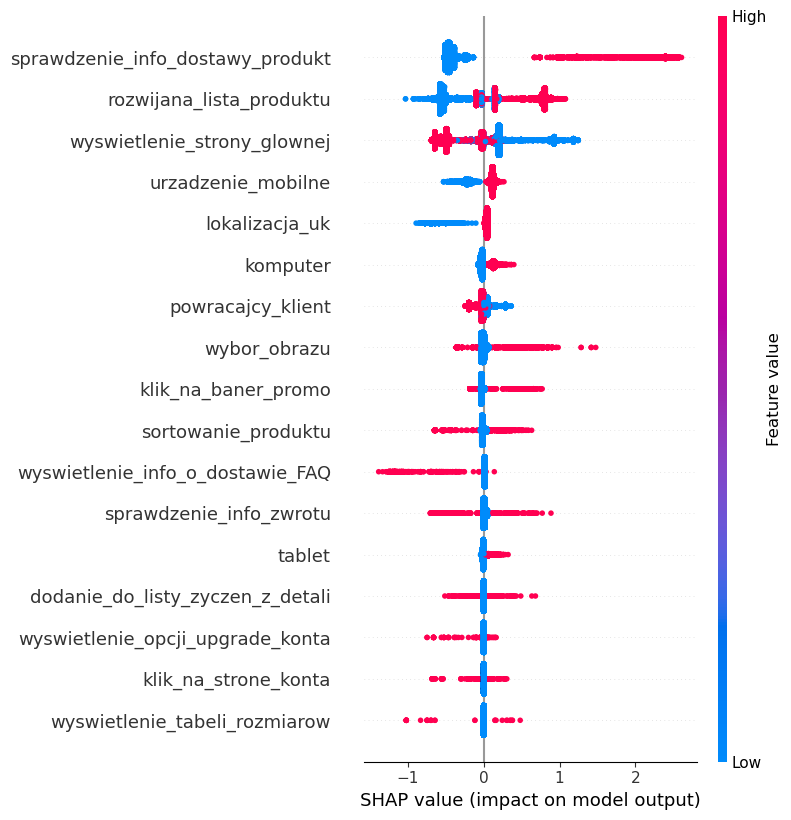

In [58]:
import shap

# Inicjalizacja eksplainera SHAP z modelem
explainer = shap.Explainer(best_model, X_train)

# Generowanie SHAP wartości dla danych testowych
shap_values = explainer.shap_values(X_test)

# Wizualizacja wyjaśnień za pomocą summary plot
shap.summary_plot(shap_values, X_test)

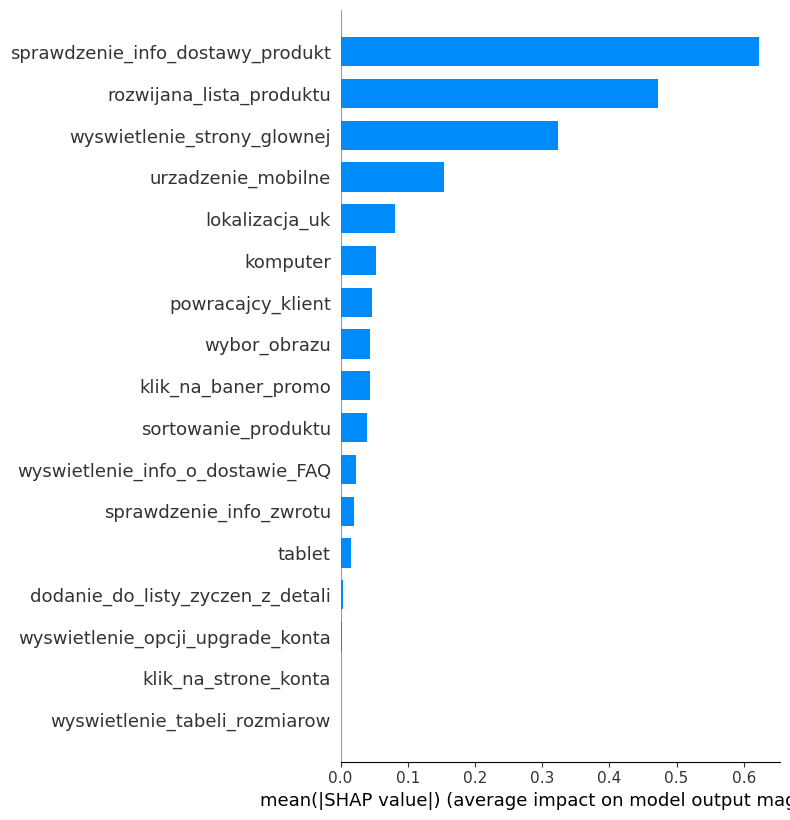

In [59]:
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
# Zapisz do pliku PNG bez tła
plt.savefig('summary_plot.png', transparent=True)

In [60]:
# tworzymy liste nazw cech
selected_features = ['sortowanie_produktu', 
                    'wybor_obrazu',
                    'klik_na_strone_konta', 
                    'klik_na_baner_promo',
                    'dodanie_do_listy_zyczen_z_detali', 
                    'rozwijana_lista_produktu',
                    'sprawdzenie_info_dostawy_produkt', 
                    'sprawdzenie_info_zwrotu',
                    'wyswietlenie_tabeli_rozmiarow',
                    'wyswietlenie_info_o_dostawie_FAQ', 
                    'wyswietlenie_opcji_upgrade_konta',
                    'wyswietlenie_strony_glownej', 
                    'urzadzenie_mobilne', 'komputer',
                    'tablet', 
                    'powracajcy_klient', 
                    'lokalizacja_uk']

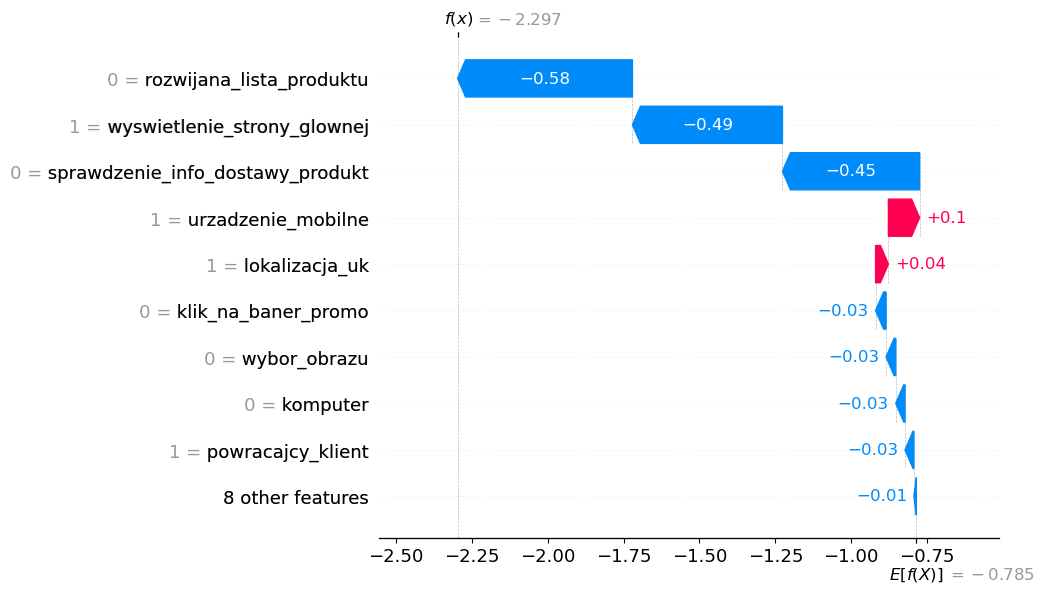

In [61]:
# Iteracja po wybranych cechach i generacja wykresu waterfall dla pierwszej próbki
for feature in selected_features:
    # Indeks wybranej cechy
    feature_index = X_test.columns.get_loc(feature)
    
    # Pobranie nazwy wybranej cechy
    feature_name = X_test.columns[feature_index]
    
# Generowanie wykresu waterfall dla pierwszej próbki
shap.waterfall_plot(shap.Explanation(values=shap_values[0], 
                                         base_values=explainer.expected_value, 
                                         data=X_test.iloc[0,:], 
                                         feature_names=X_test.columns))

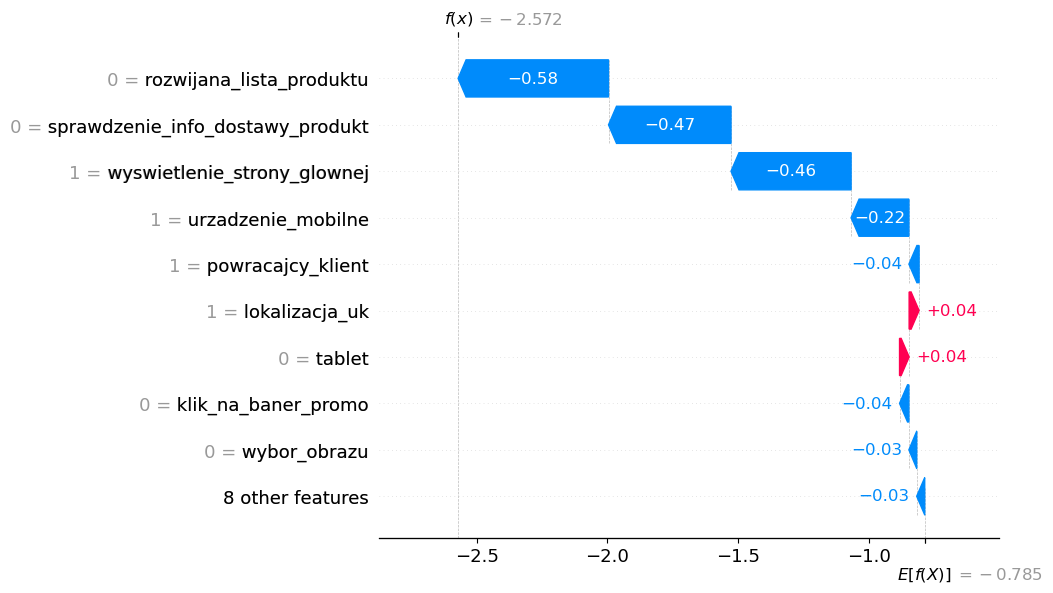

In [62]:
# Iteracja po wybranych cechach i generacja wykresu waterfall dla pierwszej próbki
for feature in selected_features:
    # Indeks wybranej cechy
    feature_index = X_test.columns.get_loc(feature)
    
    # Pobranie nazwy wybranej cechy
    feature_name = X_test.columns[feature_index]
    
# Generowanie wykresu waterfall dla pierwszej próbki
shap.waterfall_plot(shap.Explanation(values=shap_values[1], 
                                    base_values=explainer.expected_value, 
                                    data=X_test.iloc[0,:], 
                                    feature_names=X_test.columns))

In [63]:
print(shap_values)

[[-1.93712450e-02 -3.18792257e-02  0.00000000e+00 ... -7.62313275e-03
  -2.92836154e-02  4.22243901e-02]
 [-2.11676285e-02 -2.99277953e-02  0.00000000e+00 ...  3.67380361e-02
  -3.89625773e-02  3.81366376e-02]
 [-1.19254580e-02  5.20846848e-03  0.00000000e+00 ... -5.16934459e-03
  -8.84126396e-03  3.02493445e-02]
 ...
 [ 8.30015335e-03  2.94484043e-02  0.00000000e+00 ... -8.81399996e-03
   1.40473439e-01  4.07848084e-02]
 [-7.81108717e-03 -1.47869745e-01  0.00000000e+00 ...  2.54831979e-04
  -5.80297825e-02  2.75793765e-02]
 [-2.26629135e-02  6.97641006e-01  0.00000000e+00 ... -7.64260611e-03
   8.67891287e-03  3.67730825e-02]]


In [64]:
len(shap_values)

44013

In [65]:
# Przewidywania modelu dla danych testowych
predictions = model.predict_proba(X_test)

# Znalezienie indeksu próbki z najwyższą wartością przewidywania dla klasy pozytywnej (dla modeli binarnych)
# Dla modelu binarnego `predictions[:, 1]` zawiera prawdopodobieństwa klasy pozytywnej
best_sample_index_by_prediction = predictions[:, 1].argmax()

print(f"Próbka z najwyższą wartością przewidywania: Indeks {best_sample_index_by_prediction}, Wartość {predictions[best_sample_index_by_prediction, 1]}")

Próbka z najwyższą wartością przewidywania: Indeks 32649, Wartość 0.9502170085906982


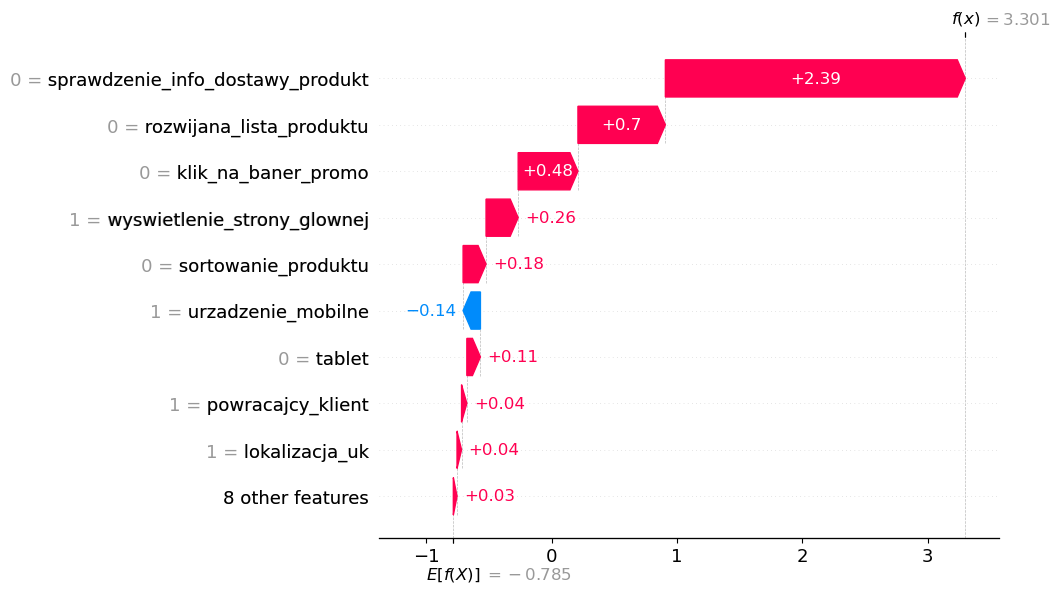

In [66]:
# Generowanie wykresu waterfall dla pierwszej próbki
shap.waterfall_plot(shap.Explanation(values=shap_values[32649], 
                                    base_values=explainer.expected_value, 
                                    data=X_test.iloc[0,:], 
                                    feature_names=X_test.columns))

In [67]:
# Sprawdzenie kształtu shap_values
shap_values_shapes = [sv.shape for sv in shap_values]
print(f"Kształty shap_values: {shap_values_shapes}")

Kształty shap_values: [(17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,

In [68]:
# Sumowanie bezwzględnych wartości SHAP dla każdej próbki dla każdej klasy
sum_abs_shap_values_all_classes = [np.sum(np.abs(sv), axis=-1) for sv in shap_values]

# Największą wartość i jej indeks
max_value_index = np.argmax(sum_abs_shap_values_all_classes)
max_value = np.max(sum_abs_shap_values_all_classes)

print("Największa wartość sum_abs_shap_values_all_classes:", max_value)
print("Indeks największej wartości:", max_value_index)


Największa wartość sum_abs_shap_values_all_classes: 5.812740783784975
Indeks największej wartości: 32229


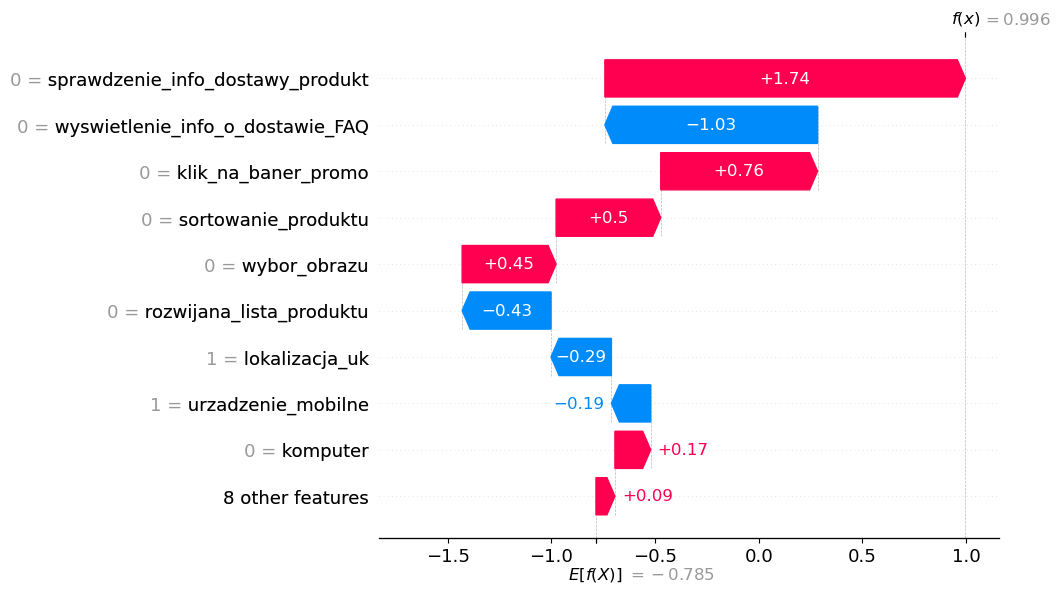

In [69]:
# Generowanie wykresu waterfall dla wybranej próbki
shap.waterfall_plot(shap.Explanation(values=shap_values[32229], 
                                    base_values=explainer.expected_value, 
                                    data=X_test.iloc[0,:], 
                                    feature_names=X_test.columns))